#Retail Sales Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [3]:
df  = pd.read_csv('retail_sales_dataset.csv')
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [5]:
# Describe the statistics
df.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


In [6]:
df.info() # we can see there are no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [7]:
df.isna().sum() # no null values

,0
Transaction ID,0
Date,0
Customer ID,0
Gender,0
Age,0
Product Category,0
Quantity,0
Price per Unit,0
Total Amount,0


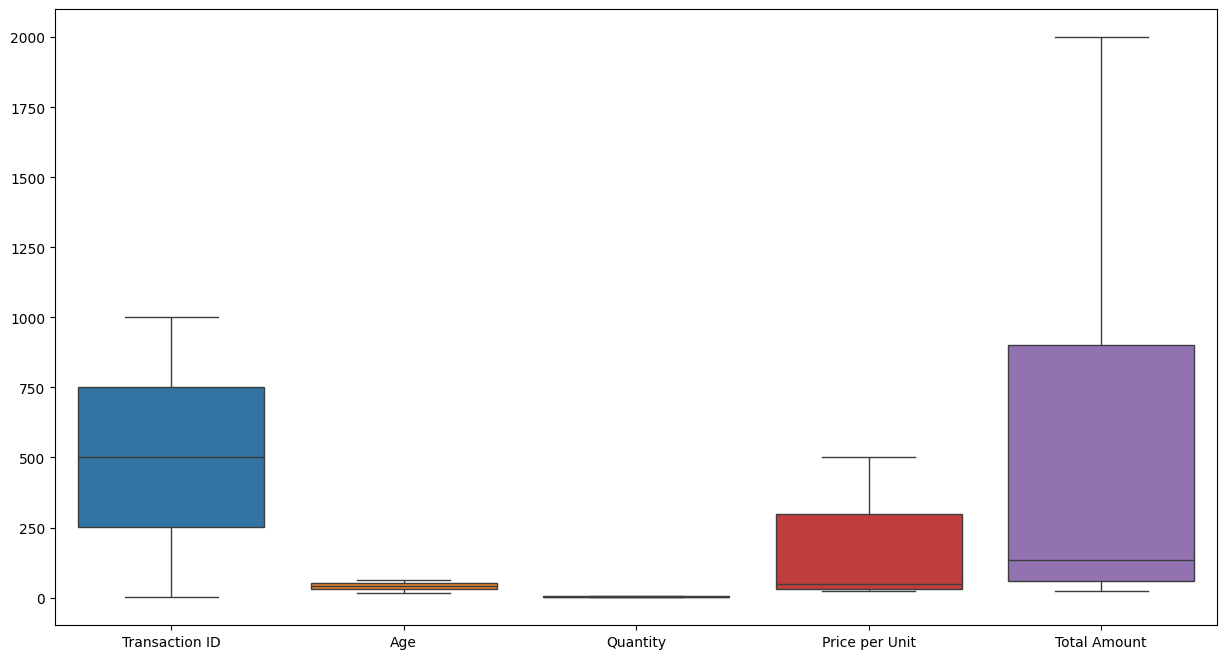

In [10]:
#to check for outliers
plt.figure(figsize = (15,8))
sns.boxplot(data = df)
plt.show()

In [11]:
# Outlier Treatment
Q1 = df['Price per Unit'].quantile(0.25)
Q3 = df['Price per Unit'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
df = df[(df['Price per Unit'] >= lower) & (df['Price per Unit'] <= upper)]


In [12]:
Q1 = df['Total Amount'].quantile(0.25)
Q3 = df['Total Amount'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
df = df[(df['Total Amount'] >= lower) & (df['Total Amount'] <= upper)]

In [14]:
df.columns

Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount'],
      dtype='object')

<Axes: xlabel='Age', ylabel='Count'>

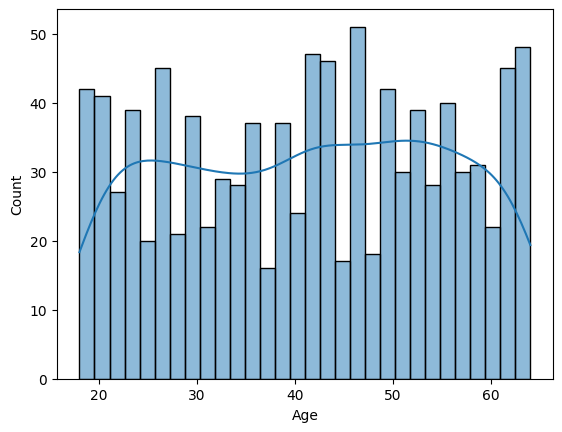

In [15]:
# Histogrram of Age
sns.histplot(df['Age'], kde = True, bins = 30)

Text(0, 0.5, 'Count')

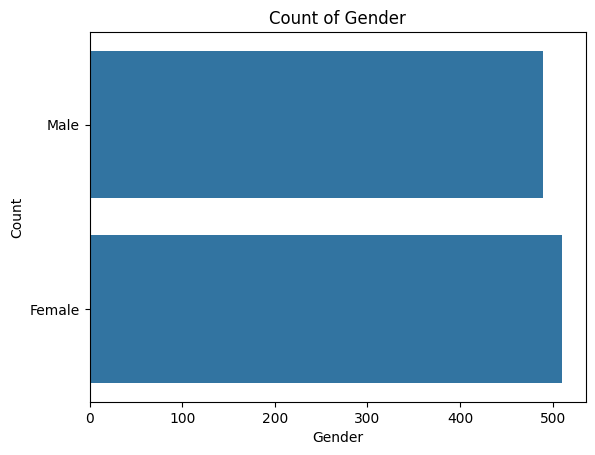

In [20]:
# Countplot of Gender
sns.countplot(df['Gender'])
plt.title('Count of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
# the number of females > males

<Axes: xlabel='count', ylabel='Product Category'>

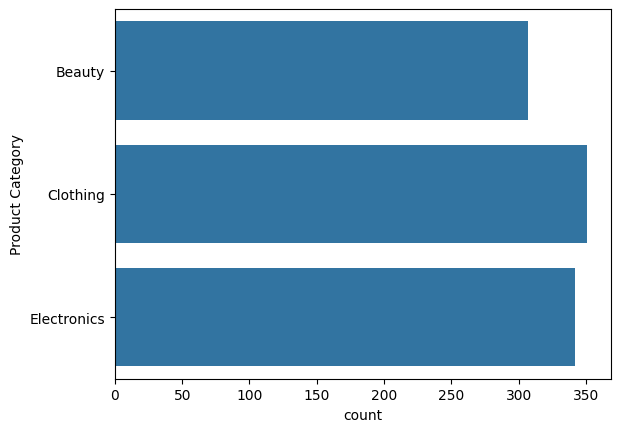

In [21]:
sns.countplot(df['Product Category'])

# From the above countplot it is seen that electronic items are more than the other two products

<Axes: xlabel='Product Category', ylabel='Price per Unit'>

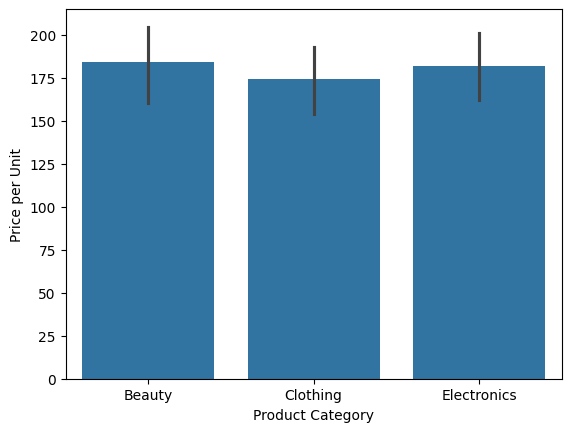

In [24]:
sns.barplot(x = 'Product Category', y = 'Price per Unit', data = df)

<Axes: xlabel='Product Category', ylabel='Total Amount'>

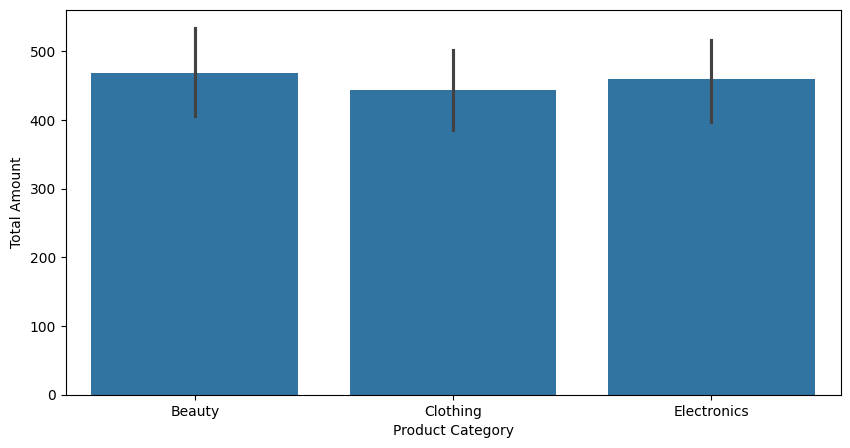

In [28]:
plt.figure(figsize = (10,5))
sns.barplot(y = 'Total Amount', x = 'Product Category', data = df)


# From the above countplot it can be inferred that since the number of females is more than males, the beauty products are sold the most as  compared to clothing and electronics.

<Axes: xlabel='Quantity', ylabel='Price per Unit'>

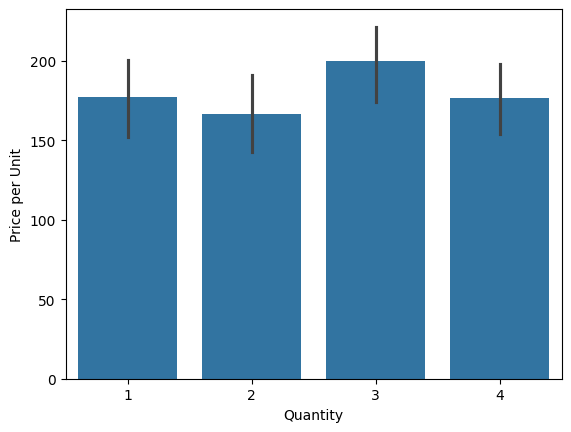

In [30]:
sns.barplot(y = 'Price per Unit', x = 'Quantity', data = df)


<Axes: xlabel='Quantity', ylabel='Product Category'>

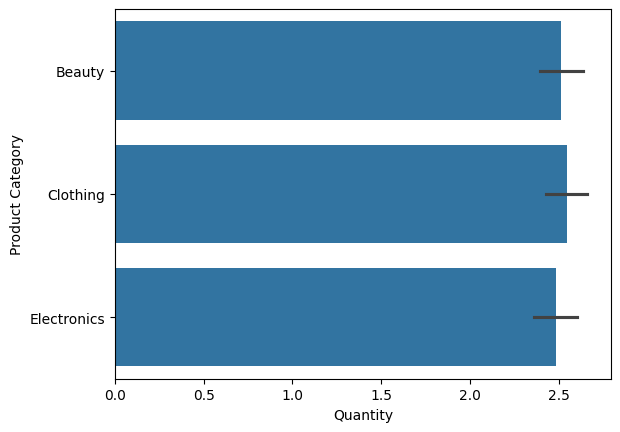

In [31]:
sns.barplot(y = 'Product Category', x = 'Quantity', data = df)


<Axes: ylabel='count'>

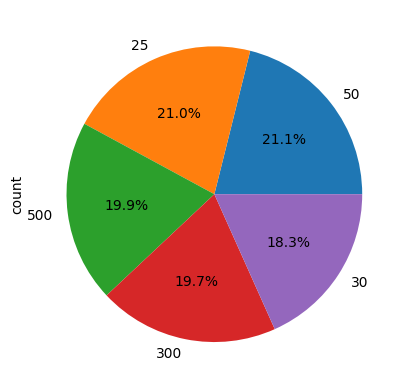

In [36]:
df['Price per Unit'].value_counts().plot.pie(autopct  = '%1.1f%%')

<Axes: ylabel='count'>

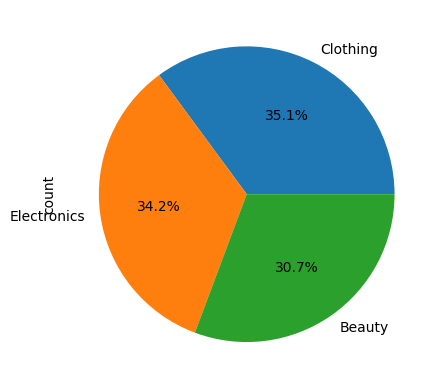

In [34]:
df['Product Category'].value_counts().plot.pie(autopct  = '%1.1f%%')

# From the above pie plot and count  plots it can be observed that the number of beauty, clothing, electronic products are almost the same. But the purchase of beauty products is more as the number of females is more. To  increase the sales of electronics , the quantity of electronic and clothing can be  increased and discounts can be offered on them

In [38]:
df['Total Units'] = df['Total Amount']/ df['Price per Unit']

In [39]:
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Total Units
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,3.0
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,2.0
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,1.0
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,1.0
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,2.0


<Axes: xlabel='Product Category', ylabel='Total Units'>

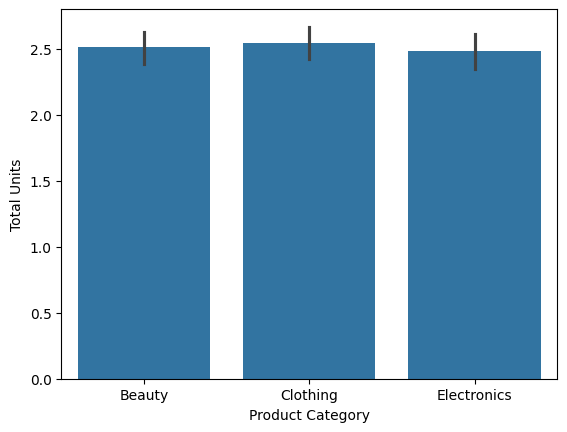

In [40]:
sns.barplot(y = 'Total Units', x = 'Product Category', data = df)

In [41]:
# Label Encoding
df['Product Category'] =  df['Product Category'].map({'Beauty': 0, 'Clothing': 1, 'Electronics': 2})
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Total Units
0,1,2023-11-24,CUST001,Male,34,0,3,50,150,3.0
1,2,2023-02-27,CUST002,Female,26,1,2,500,1000,2.0
2,3,2023-01-13,CUST003,Male,50,2,1,30,30,1.0
3,4,2023-05-21,CUST004,Male,37,1,1,500,500,1.0
4,5,2023-05-06,CUST005,Male,30,0,2,50,100,2.0


In [48]:
df['Gender'] =  df['Gender'].map({'Femlae': 1, 'Male':2})
df.head()


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Total Units
0,1,2023-11-24,CUST001,2.0,34,0,3,50,150,3.0
1,2,2023-02-27,CUST002,NaN,26,1,2,500,1000,2.0
2,3,2023-01-13,CUST003,2.0,50,2,1,30,30,1.0
3,4,2023-05-21,CUST004,2.0,37,1,1,500,500,1.0
4,5,2023-05-06,CUST005,2.0,30,0,2,50,100,2.0


<Axes: >

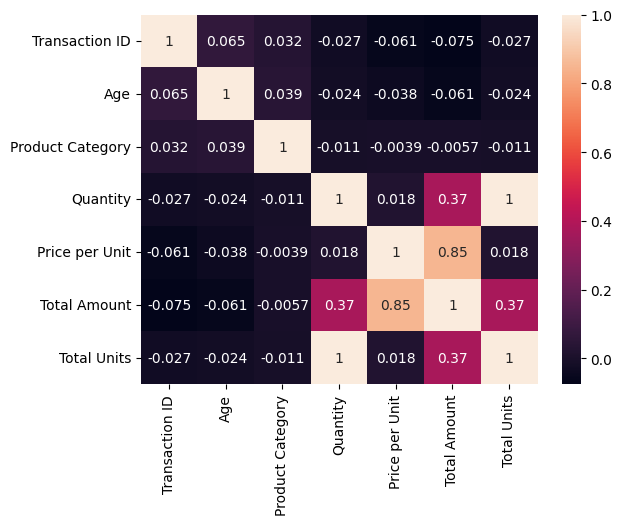

In [46]:
corr = df.drop(columns=['Date', 'Customer ID', 'Gender']).corr()
sns.heatmap(corr, annot = True)

In [54]:
from sklearn.linear_model import LinearRegression
line = LinearRegression()
line.fit(df[['Product Category', 'Total Units']], df['Total Amount'])



LinearRegression()

In [56]:
df['Total Units'].max()

4.0

In [58]:
df['Total Amount'].max()

2000

In [55]:
line.predict([[1,5]])

array([915.31123129])

In [57]:
line.predict([[2, 10]])

array([1837.90991706])

In [59]:
line.predict([[2, 15]])

array([2761.62691311])